In [1]:
#!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 4.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 4.6 MB/s eta 0:00:00 MB/s eta 0:00:01


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes # (당뇨병 환자) built-in data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
diabetes = load_diabetes()
print(diabetes['data'])
print(diabetes['target'])
print(diabetes.DESCR) # dict형태이기 때문에 DESCR만 보기 == 데이터의 정보
# diabetes['DESCR']

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [3]:
X, y = load_diabetes(return_X_y = True)
#print(type(X))
#print(type(y))
print(X.shape, y.shape)
# X = data, y = target 대문자, 소문자는 차원의 차이이다.
print(X)
print(y)

(442, 10) (442,)
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10) # 튜풀형태의 4개의 ndarray로 반환

m = LinearRegression()
m.fit(X_train, y_train) # 머신러닝이 끝나면 회귀선을 긋는 공식이 완성 된것, X_train 저 자리에는 2차원 데이터여야만 한다.
print(m.coef_) # 기울기
print(m.intercept_) # y절편

# target = 6.7924784*age - 224.39685223*sex + 505.73935978*bmi + ... + 151.79831831053387

# 얼마나 잘 테스트 했는지 스코어
train_score = m.score(X_train, y_train)
print(train_score)

train_r2 = r2_score(y_train, m.predict(X_train)) # y_train ==정답, X_train == 예측값
print(train_r2)


# 보통 검증을 할때는 test data를 사용하여 검증
test_score = m.score(X_test, y_test)
print(test_score)
test_r2 = r2_score(y_test, m.predict(X_test))
print(test_r2)

[   6.7924784  -224.39685223  505.73935978  319.35318609 -776.39893593
  396.87458108  132.80380166  308.91529418  689.37659909   53.89074748]
151.79831831053397
0.5112345828164674
0.5112345828164674
0.5282320385429604
0.5282320385429604


### 머신러닝의 대략적인 틀
#### 1. 데이터 로딩
#### 2. 데이터 train, test로 나누고
#### 3. fit해서 계산을 한다.
#### 4. 검증하는 단계

[950.49561372] 152.91978688616442
950.4956137180635 152.91978688616442


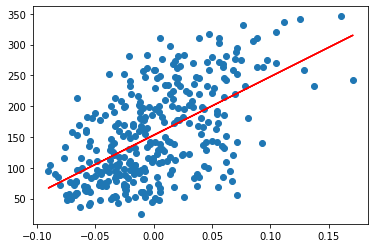

In [5]:
x_bmi = X[:,2] # 전체 데이터에서 bmi데이터만 들고온다.
X_bmi = x_bmi[:, np.newaxis] # 2차원으로 맞추기 위해 X_train

X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, random_state = 10)
m = LinearRegression().fit(X_train, y_train)
print(m.coef_, m.intercept_) # plot , intercept


# using formula
x_mean = np.mean(X_train[:, 0])
y_mean = np.mean(y_train)
x_std = np.std(X_train[:, 0])
y_std = np.std(y_train)
xy_corr = np.corrcoef(X_train[:, 0], y_train)[0,1]

my_slope = xy_corr * (y_std/x_std)
my_inter = y_mean - (my_slope * x_mean)

print(my_slope, my_inter)


y_pred = m.coef_ * X_train[:, 0] + m.intercept_

_, axe = plt.subplots()
axe.scatter(X_train[:,0], y_train)
#axe.plot(X_train[:,0], y_pred, c = 'r')
axe.plot(X_train[:,0], m.predict(X_train), c ='r') # 위와 동일

In [6]:
def my_line(x, coef =1.0, intercept= 1.0):
    return x*coef+intercept

def err(y, y_pred):
    return y - y_pred

def sqerr(y, y_pred):
    return ((y-y_pred)**2).sum()

# 모델의 성능을 평가하는 것은 base로 mean 값을 깐다.
# R^2 score는 mean값으로 예측하는 거 대비 얼마나 좋은가를 뜻한다. 1에 가까울 수록 좋다.

def rsq(y, y_pred): # 1에 가까울수록 rsq는 mean값 대비 얼마나 좋은 모델인가 (1에 가까울수록 좋다.)
    return 1 - (sqerr(y, y_pred) / sqerr(y, y.mean()))

# 경사하강법
def brute(x, y, a = 1.0, b = 1.0): # a = 기울기, b = 절편
    y_hat = x*a + b
    while y - y_hat > 1: # 에러값 계산
        print(a,b)
        a = a + x # 기울기 변환
        b = b + 1 # 절편 변환 
        y_hat = x*a + b # 예측값 조정
    return a, b

# 역전파 - error값을 새로운 기울기를 구하는 데 사용한다.
def back_prop(x, y, a = 1.0, b = 1.0):
    y_hat = x*a+ b
    err = y - y_hat
    a = a+x*err
    b = b+1*err
    return a, b

In [7]:
target_pred = my_line(X_train[:,0], m.coef_, m.intercept_) # y_pred(예측값)
sqerr(y_train, target_pred) #error값, 직선과 실제값의 차이를 제곱하고 다 더한 것

# 모델의 성능을 평가하는 것은 base로 mean 값을 깐다.
print(rsq(y_train, target_pred))
print(m.score(X_train, y_train))

# col 한개를 쓰는것보다 col 여러개를 쓰는것이 훨씬 좋다.

0.3322712894001999
0.3322712894001999


In [8]:
# SGDRegressor == 경사하강법

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10) # 튜풀형태의 4개의 ndarray로 반환

# max_iter의 기본값은 1000번 (얼만큼 반복되는지)
m = SGDRegressor(max_iter = 10000)
m.fit(X_train, y_train) # 머신러닝이 끝나면 회귀선을 긋는 공식이 완성 된것, X_train 저 자리에는 2차원 데이터여야만 한다.
print(m.coef_) # 기울기
print(m.intercept_) # y절편

# target = 6.7924784*age - 224.39685223*sex + 505.73935978*bmi + ... + 151.79831831053387

# 얼마나 잘 테스트 했는지 스코어
train_score = m.score(X_train, y_train)
print(train_score)

train_r2 = r2_score(y_train, m.predict(X_train)) # y_train ==정답, X_train == 예측값
print(train_r2)


# 보통 검증을 할때는 test data를 사용하여 검증
test_score = m.score(X_test, y_test)
print(test_score)
test_r2 = r2_score(y_test, m.predict(X_test))
print(test_r2)

# error message = ConvergenceWarning:, 수렴이 되지 않았다.

[  37.26404402 -151.28043644  432.38485659  271.38844268  -29.6898466
  -91.06729433 -202.37528108  160.84139725  356.71712722  114.20775459]
[151.58517531]
0.4990083382677317
0.4990083382677317
0.5068208845474766
0.5068208845474766


[785.74678486] [152.91707637]
950.4956137180635 152.91978688616442


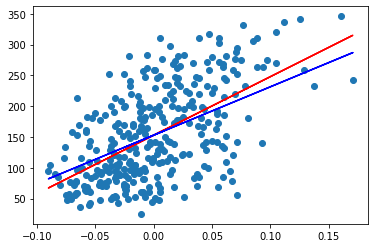

In [9]:
# SGDRegressor == 경사하강법

x_bmi = X[:,2] # 전체 데이터에서 bmi데이터만 들고온다.
X_bmi = x_bmi[:, np.newaxis] # 2차원으로 맞추기 위해 X_train

X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, random_state = 10)
m = SGDRegressor(max_iter = 10000).fit(X_train, y_train)
print(m.coef_, m.intercept_) # plot , intercept


# using formula
x_mean = np.mean(X_train[:, 0])
y_mean = np.mean(y_train)
x_std = np.std(X_train[:, 0])
y_std = np.std(y_train)
xy_corr = np.corrcoef(X_train[:, 0], y_train)[0,1]

my_slope = xy_corr * (y_std/x_std)
my_inter = y_mean - (my_slope * x_mean)

print(my_slope, my_inter)


y_pred = m.coef_ * X_train[:, 0] + m.intercept_

_, axe = plt.subplots()
axe.scatter(X_train[:,0], y_train)
#axe.plot(X_train[:,0], y_pred, c = 'r')
axe.plot(X_train[:,0], my_slope * X_train[:, 0] + my_inter, c = 'r') # LineRegression 값
axe.plot(X_train[:,0], m.predict(X_train), c ='b') # 위와 동일 # SGDRegressor 값

In [10]:
a = rsq(y_train, my_slope * X_train[:, 0] + my_inter) # LineRegression 값
b = rsq(y_train, m.predict(X_train))                 # SGDRegressor 값 정확도 떨어진다.

print(a,b)

0.3322712894001999 0.3222886390702191


1.0 1.0
1.0616962065186832 2.0
1.1233924130373665 3.0
1.1850886195560497 4.0
1.246784826074733 5.0
1.3084810325934162 6.0
1.3701772391120994 7.0
1.4318734456307827 8.0
1.493569652149466 9.0
1.5552658586681491 10.0
1.6169620651868324 11.0
1.6786582717055156 12.0
1.7403544782241989 13.0
1.802050684742882 14.0
1.8637468912615653 15.0
1.9254430977802486 16.0
1.9871393042989318 17.0
2.0488355108176153 18.0
2.1105317173362987 19.0
2.172227923854982 20.0
2.2339241303736657 21.0
2.295620336892349 22.0
2.3573165434110326 23.0
2.419012749929716 24.0
2.4807089564483995 25.0
2.542405162967083 26.0
2.6041013694857664 27.0
2.66579757600445 28.0
2.7274937825231333 29.0
2.789189989041817 30.0
2.8508861955605003 31.0
2.9125824020791837 32.0
2.974278608597867 33.0
3.0359748151165507 34.0
3.097671021635234 35.0
3.1593672281539176 36.0
3.221063434672601 37.0
3.2827596411912845 38.0
3.344455847709968 39.0
3.4061520542286514 40.0
3.467848260747335 41.0
3.5295444672660183 42.0
3.591240673784702 43.0
3.652936

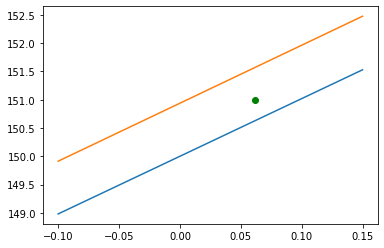

In [11]:
###

_, axe = plt.subplots()
xs = np.linspace(-0.1, 0.15, 10)
bmi = X[:, 2]
target = y

axe.scatter(bmi[0], target[0], c = 'g')
#axe.plot(xs, my_line(xs, coef = 1.0, intercept = 1.0))

a1, b1 = brute(bmi[0], target[0])
print(a1, b1)
axe.plot(xs, my_line(xs, coef = a1, intercept = b1))

# 경사하강법이 너무 많이 계산을 하다보니 비효율 적이여서 나온것이 역전파 방법이다.
a2, b2 = back_prop(bmi[0], target[0])
print(a2, b2)
axe.plot(xs, my_line(xs, coef = a2, intercept = b2))

# 절편은 조금 다르지만, 기울기는 비슷하다.

In [12]:
a = 1.0
b = 1.0
for bmi_i, target_i in zip(bmi, target):
    a, b = back_prop(bmi_i, target_i, a, b)
print(a, b)

587.8654539985616 99.4093556453094


587.8654539985616 99.4093556453094


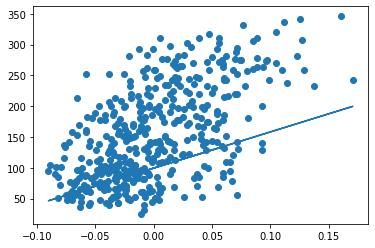

In [13]:
# 이게 한번 한거다.

a = 1.0
b = 1.0
for i in range(bmi.shape[0]):
    a, b = back_prop(bmi[i], target[i], a, b)
print(a, b)

_, axe = plt.subplots()
axe.scatter(bmi, target)
axe.plot(bmi, bmi*a+b)

913.5973364346786 123.39414383177173


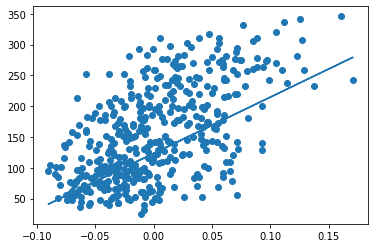

In [14]:
a = 1.0
b = 1.0
for e in range(50): # 에포크 50번
    for i in range(bmi.shape[0]):
        a, b = back_prop(bmi[i], target[i], a, b)
print(a, b)

_, axe = plt.subplots()
axe.scatter(bmi, target)
axe.plot(bmi, bmi*a+b)

587.8654539985616 99.4093556453094


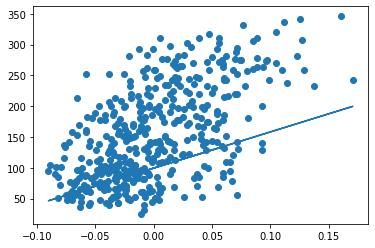

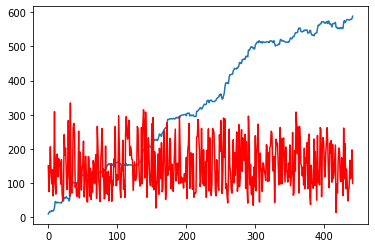

In [15]:
a = 1.0
b = 1.0

hist_a = []
hist_b = []
for i in range(bmi.shape[0]):
    a, b = back_prop(bmi[i], target[i], a, b)
    hist_a.append(a)
    hist_b.append(b)
print(a, b)

_, axe = plt.subplots()
axe.scatter(bmi, target)
axe.plot(bmi, bmi*a+b)

_,axe = plt.subplots()
axe.plot(hist_a)
axe.plot(hist_b, c='r')

913.5973364346786 123.39414383177173


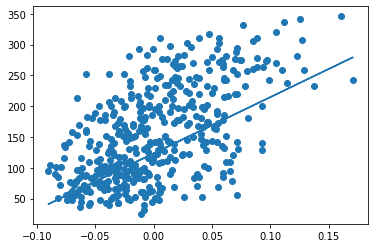

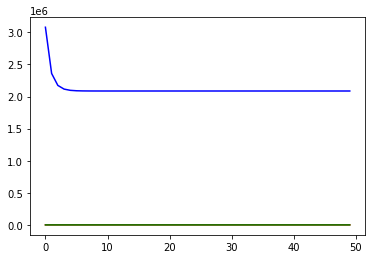

In [16]:
a = 1.0
b = 1.0
hist_a = []
hist_b = []
hist_sqerr = []
for e in range(50):
    for i in range(bmi.shape[0]):
        a, b = back_prop(bmi[i], target[i], a, b)
    hist_a.append(a)
    hist_b.append(b)
    t = np.array(target) # 정답
    m = np.array(my_line(bmi, a, b)) # 예측값
    hist_sqerr.append(sqerr(t, m))
        #hist_sqerr.append(sqerr(target, my_line(bmi, a, b)))
print(a, b)

_, axe = plt.subplots()
axe.scatter(bmi, target)
axe.plot(bmi, bmi*a+b)

_, axe = plt.subplots()
axe.plot(hist_a, c = 'r')
axe.plot(hist_b, c = 'g')
axe.plot(hist_sqerr, c = 'b')

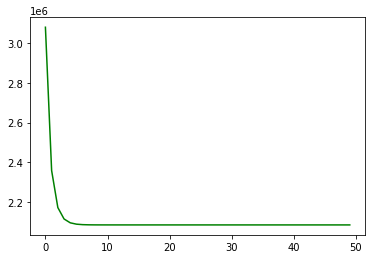

In [19]:
_, axe = plt.subplots()
#axe.plot(hist_a, c = 'r')
#axe.plot(hist_b, c = 'b')
axe.plot(hist_sqerr, c = 'g')